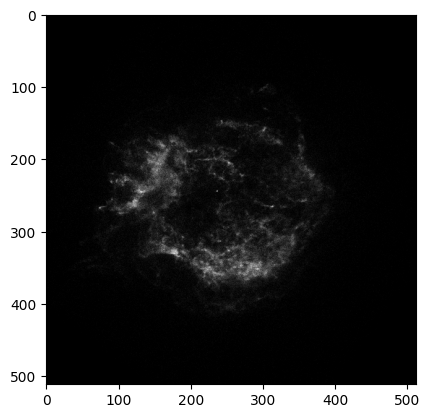

In [1]:
from astropy.io import fits

# Open a FITS file
hdulist = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casared.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
hdulist.close()  # Close the FITS file
import matplotlib.pyplot as plt
plt.imshow(data, cmap='gray')
plt.show()
header = hdulist[0].header

In [2]:
# Print the header information
print(header)

SIMPLE  =                    T /                                                BITPIX  =                   16 / bits/pixel                                     NAXIS   =                    2 /                                                NAXIS1  =                  512 / x axis dimension                               NAXIS2  =                  512 / y axis dimension                               HDUNAME = 'EVENTS  '           / ASCDM block name                               LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.COMMENT   This FITS file may contain long string keyword values that are        COMMENT   continued over multiple keywords.  The HEASARC convention uses the &  COMMENT   character at the end of each substring which is then continued        COMMENT   on the next keyword which has the name CONTINUE.                      HDUCLASS= 'OGIP    '                                                            HDUCLAS1= 'EVENTS  '                    

#***Applying Equalizer***

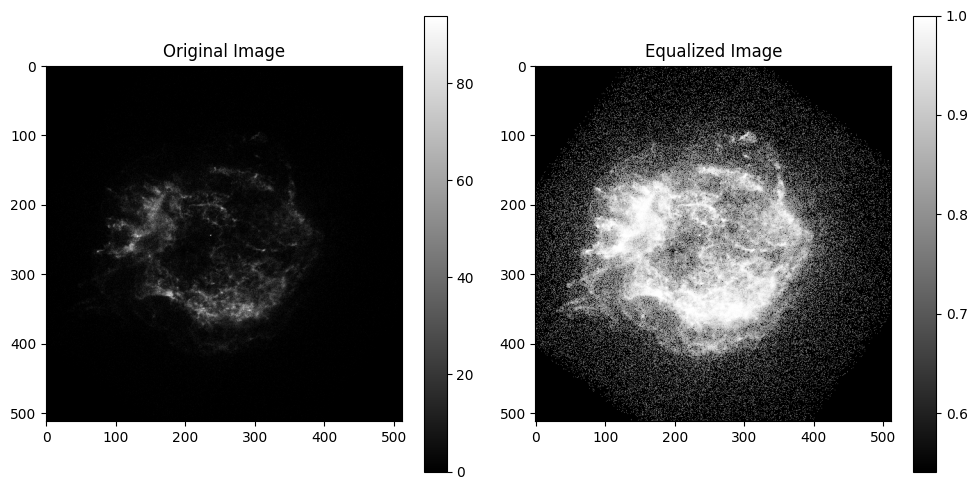

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure

# Open a FITS file
hdulist = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casared.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()

# Perform histogram equalization to enhance image contrast
data_equalized = exposure.equalize_hist(data)

# Display the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

#***Composite***

C:\Users\kayna\AppData\Local\Temp\ipykernel_2988\1255515905.py:22: RuntimeWarning: invalid value encountered in divide
  data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
C:\Users\kayna\AppData\Local\Temp\ipykernel_2988\1255515905.py:23: RuntimeWarning: invalid value encountered in divide
  data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())
C:\Users\kayna\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


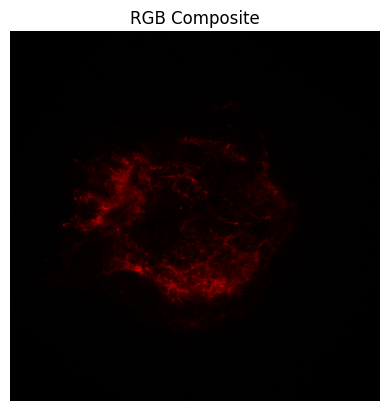

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casared.fits')
hdulist_green = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casagreen.fits')
hdulist_blue = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casablue.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Normalize each channel's data to the [0, 1] range
data_red_normalized = (data_red - data_red.min()) / (data_red.max() - data_red.min())
data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())

# Stack the channels to create the RGB composite
rgb_image = np.dstack((data_red_normalized, data_green_normalized, data_blue_normalized))

# Display the RGB composite
plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()

#***Histogram***

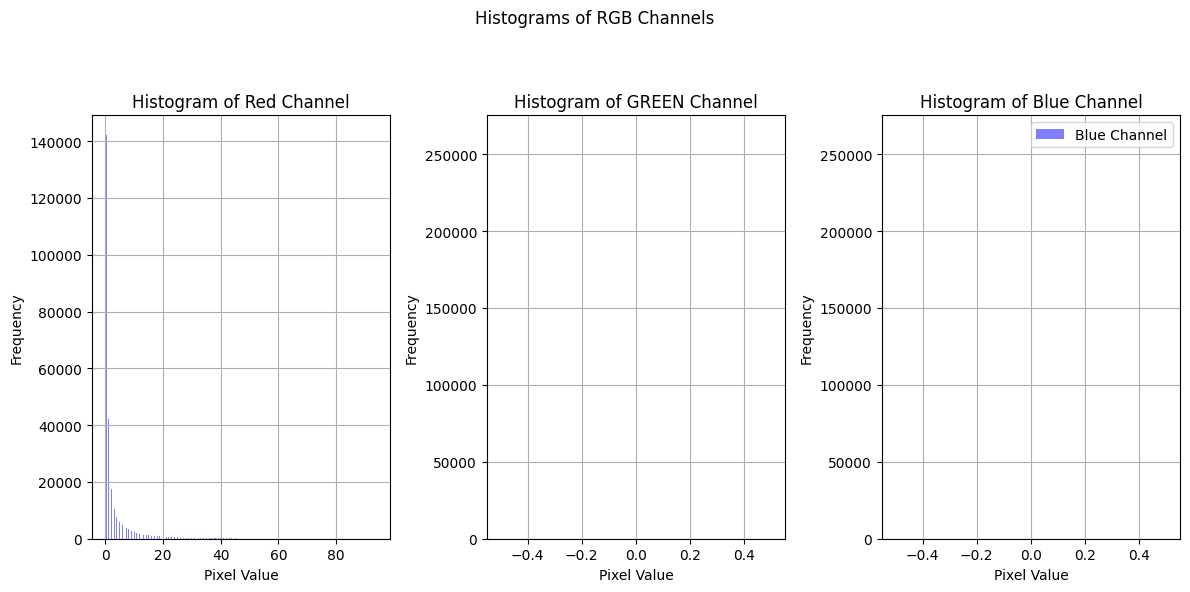

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to create and display histograms
def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casared.fits')
hdulist_nir = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casagreen.fits')
hdulist_blue = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casablue.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data


# Create histograms for each channel
plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_nir,  'GREEN Channel', 'Histogram of GREEN Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

#***Statistical Data***

In [8]:
import numpy as np
from astropy.io import fits

# Function to compute and display statistics
def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    # Remove negative values and convert the data to integers by rounding to the nearest integer
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0]  # Remove negative values
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)  # Calculate standard deviation
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casared.fits')
hdulist_green = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casagreen.fits')
hdulist_blue = fits.open('C:\\Users\\kayna\\Desktop\\ds9 images\\ds9.fits\\casablue.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Compute and display statistics for each channel
compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 2.68
Median: 0.00
Mode: 0.0

Standard Deviation: 6.14

Statistics for NIR Channel:
Mean: 0.00
Median: 0.00
Mode: 0.0

Standard Deviation: 0.00

Statistics for Blue Channel:
Mean: 0.00
Median: 0.00
Mode: 0.0

Standard Deviation: 0.00

